# Análise dos Dados

__Ideia motivadora__: Aumentar o número de contratações do plano anual entre os membros da Cyclistic

#### Três perguntas nortearão o futuro programa de marketing:

-  Como os membros anuais e os ciclistas casuais usam as bicicletas da Cyclistic de forma diferente?
- Por que os passageiros casuais iriam querer adquirir planos anuais da Cyclistic?
- Como a Cyclistic pode usar a mídia digital para influenciar os passageiros casuais a se tornarem membros? A Lily lhe apresentou a primeira pergunta a ser respondida: Como os membros anuais e os ciclistas casuais usam as bicicletas da Cyclistic de forma diferente?

Comparar entre os tipos de cliente:
- Aluguéis por dia da semana
- Tipos de bicicletas
- Duração média entre os usuarios

Entender melhor o tipo de uso entre os casuais



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 10})

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/cyclistic-dataset-cleaned.csv')

In [5]:
df.head()

,ride_id,rideable_type,started_at,member_casual,day_week,duration
0,D8EEE72183269F07,classic_bike,2023-01-01 00:02:06,member,Sunday,0 days 00:27:40
1,E5AD797A579842F8,electric_bike,2023-01-01 00:03:26,casual,Sunday,0 days 00:03:57
2,8FBD2AD70B0F6A6F,classic_bike,2023-01-01 00:04:07,casual,Sunday,0 days 00:09:49
3,B05BD052B9EBB767,electric_bike,2023-01-01 00:04:27,member,Sunday,0 days 00:12:25
4,F9EA7B9E6C243CFC,classic_bike,2023-01-01 00:04:54,member,Sunday,0 days 00:26:58


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570261 entries, 0 to 5570260
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ride_id        object
 1   rideable_type  object
 2   started_at     object
 3   member_casual  object
 4   day_week       object
 5   duration       object
dtypes: object(6)
memory usage: 255.0+ MB


In [7]:
df['duration'] = pd.to_timedelta(df['duration'])

In [8]:
df['started_at'] = pd.to_datetime(df['started_at'])

In [9]:
df['days'] = df['duration'].dt.days
df['hours'] = round(df['duration'].dt.seconds/3600)
df['minutes'] = round(df['duration'].dt.seconds/60)

In [10]:
df['month'] = df['started_at'].dt.strftime('%B')
df['date'] = df['started_at'].dt.date
df.drop('started_at', axis=1, inplace=True)

In [11]:
df.head()

,ride_id,rideable_type,member_casual,day_week,duration,days,hours,minutes,month,date
0,D8EEE72183269F07,classic_bike,member,Sunday,0 days 00:27:40,0,0.0,28.0,January,2023-01-01
1,E5AD797A579842F8,electric_bike,casual,Sunday,0 days 00:03:57,0,0.0,4.0,January,2023-01-01
2,8FBD2AD70B0F6A6F,classic_bike,casual,Sunday,0 days 00:09:49,0,0.0,10.0,January,2023-01-01
3,B05BD052B9EBB767,electric_bike,member,Sunday,0 days 00:12:25,0,0.0,12.0,January,2023-01-01
4,F9EA7B9E6C243CFC,classic_bike,member,Sunday,0 days 00:26:58,0,0.0,27.0,January,2023-01-01


# Comparando os alugueis durante os clientes

In [12]:
rides_total = df.groupby('member_casual').agg({'ride_id':'count'})

In [13]:
rides_total

,ride_id
member_casual,
casual,2005749
member,3564512


In [14]:
df_casual = df.query('member_casual == "casual"')

In [15]:
df_casual.shape

(2005749, 10)

In [16]:
df_member =  df.query('member_casual == "member"')

In [17]:
df_member.shape

(3564512, 10)

In [18]:
df.groupby('day_week').size()

day_week
Friday       821138
Monday       710786
Saturday     859784
Sunday       724867
Thursday     837464
Tuesday      801877
Wednesday    814345
dtype: int64

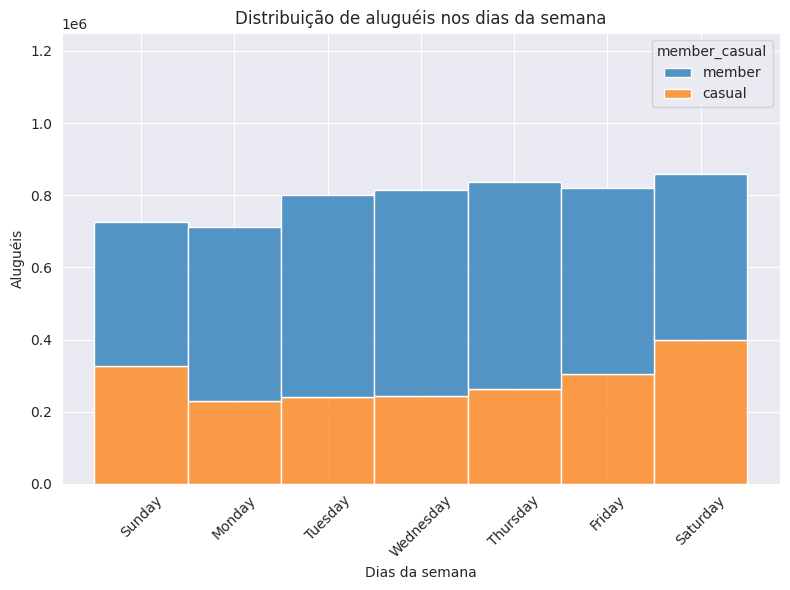

In [72]:
sns.histplot(data=df, x='day_week', hue='member_casual', multiple='stack')
plt.title('Distribuição de aluguéis nos dias da semana')
plt.ylabel('Aluguéis')
plt.xticks(rotation=45)
plt.xlabel('Dias da semana')
plt.ylim(0,1_250_000)
plt.show()

A partir do histograma é possível observar que clientes casuais tem suas maiores concentrações de alugueis nos finais de semana (Sexta, Sábado e Domingo). Já os membros anuais, também tem uma grande concentração de uso no Sábado, porém tem um perfil de uso melhor distribuído durante os dias úteis.

### Duração MENOR que um dia

In [20]:
# Media de minutos geral
df.query('days == 0').groupby('member_casual').agg({'minutes': 'mean'})

,minutes
member_casual,
casual,21.232798
member,12.370344


Membros casuais tendem a ter um uso médio maior que membros anuais independente do recorte durante a semana.

### Duração MAIOR que um dia




In [59]:
df.query('days >= 1').groupby('member_casual').agg({'days':['mean','median']})

days       
                   mean median
member_casual                 
casual         1.920563    1.0
member         1.000000    1.0

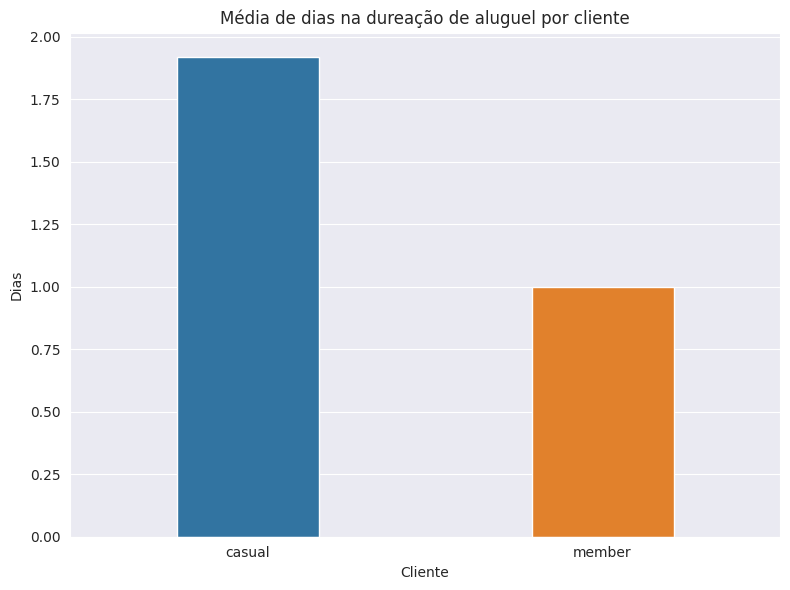

<Figure size 600x600 with 0 Axes>

In [74]:
uso_p_dia = df.query('days >= 1').groupby('member_casual').agg({'days':'mean'})
sns.barplot(uso_p_dia, x=uso_p_dia.index, y='days', hue='member_casual', width=0.4)
plt.title('Média de dias na dureação de aluguel por cliente')
plt.xlabel('Cliente')
plt.ylabel('Dias')
plt.figure(figsize=(6,6))
plt.show()

Membros casuais também fazem alugueis mais longos, em questão de dias, em relação aos membros anuais

### Analisando apenas clientes casuais


In [26]:
tipos_casuais = df_casual.groupby('rideable_type').agg({'ride_id':'count'}).sort_values('ride_id', ascending = False)
tipos_casuais

,ride_id
rideable_type,
electric_bike,1063621
classic_bike,864555
docked_bike,77573


In [27]:
tipos_anuais = df_member.groupby('rideable_type').agg({'ride_id':'count'}).sort_values('ride_id', ascending = False)
tipos_anuais

,ride_id
rideable_type,
classic_bike,1790185
electric_bike,1774327


Outra diferença é o tipo de bicicleta alugado entre os clientes. Clientes casuais preferem bicicletas elétricas à bicicletas convencionais. Há também uma parcela que utiliza as docked bikes (bicicletas acopladas).

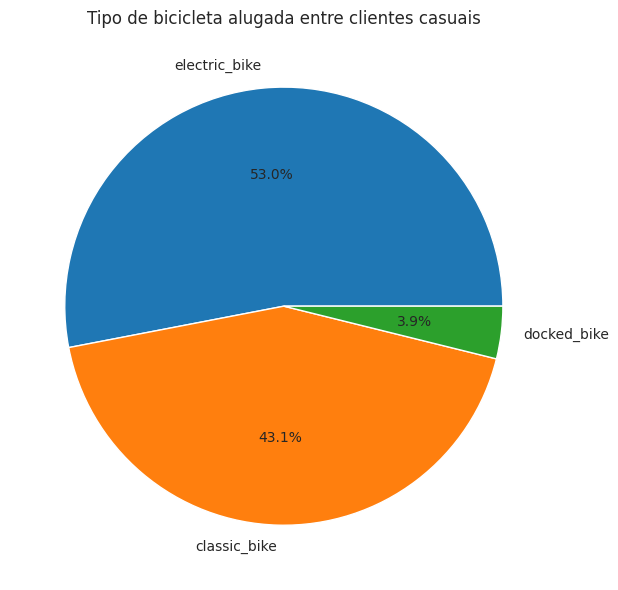

In [78]:
plt.pie(tipos_casuais['ride_id'], labels=tipos_casuais.index, autopct='%1.1f%%')
plt.title('Tipo de bicicleta alugada entre clientes casuais')
plt.show()

<Axes: title={'center': 'Série Temporal de Aluguéis'}, xlabel='Data', ylabel='Aluguéis'>

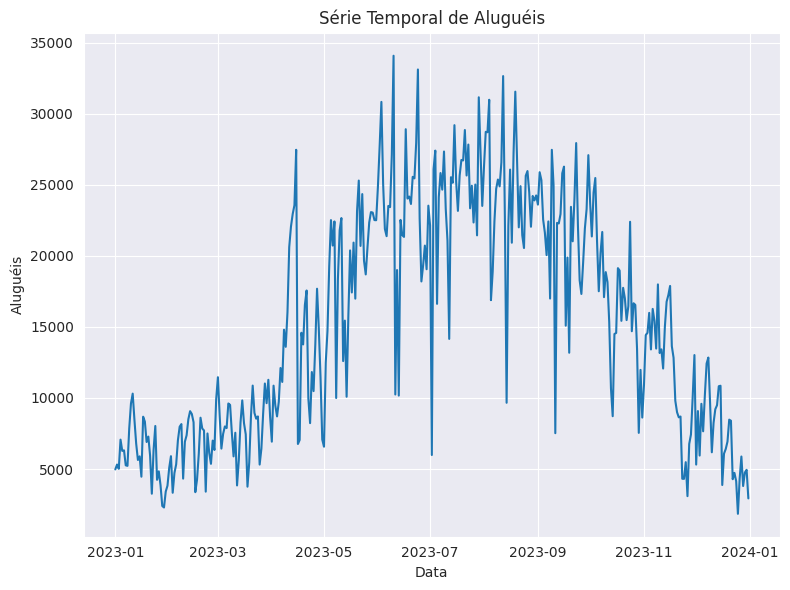

In [75]:
df.groupby('date').size().plot(kind='line', xlabel = 'Data', ylabel='Aluguéis', title='Série Temporal de Aluguéis')

In [31]:
# Analisando o número de passeios entre clientes usuais entre os meses
ordem_meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August',
               'September', 'October', 'November', 'December']

casuais_por_mes = df_casual.groupby('month').agg({'ride_id':'count'})
casuais_por_mes.index = pd.Categorical(casuais_por_mes.index, categories=ordem_meses, ordered=True)

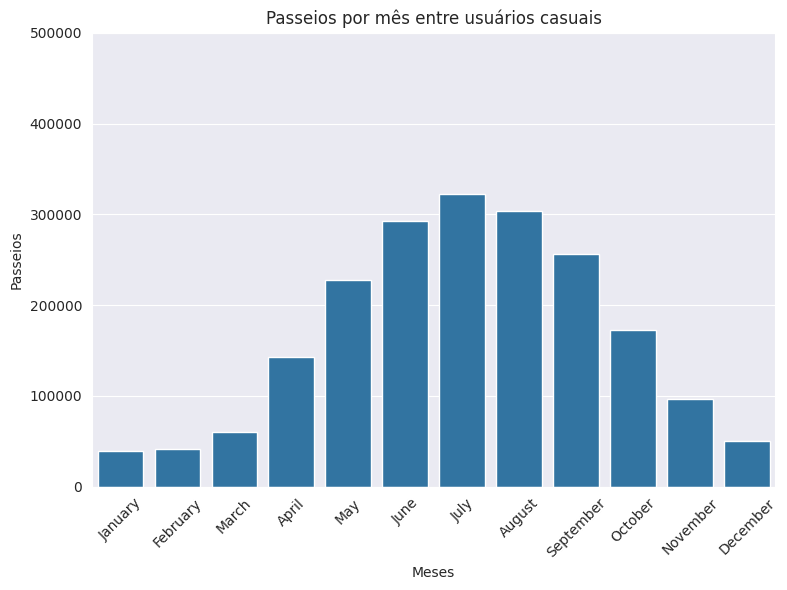

<Figure size 1200x500 with 0 Axes>

In [76]:
sns.barplot(casuais_por_mes, x=casuais_por_mes.index, y='ride_id')
plt.title('Passeios por mês entre usuários casuais')
plt.ylim((0,500_000))
plt.xlabel('Meses')
plt.ylabel('Passeios')
plt.xticks(rotation=45)
plt.figure(figsize=(12,5))
plt.show()

Os meses que compreendem o verão (Junho a Setembro) tem os maiores números de aluguéis de bicicletas.

In [49]:
anuais_por_mes = df_member.groupby('month').agg({'ride_id':'count'})
anuais_por_mes.index = pd.Categorical(anuais_por_mes.index, categories=ordem_meses, ordered=True)

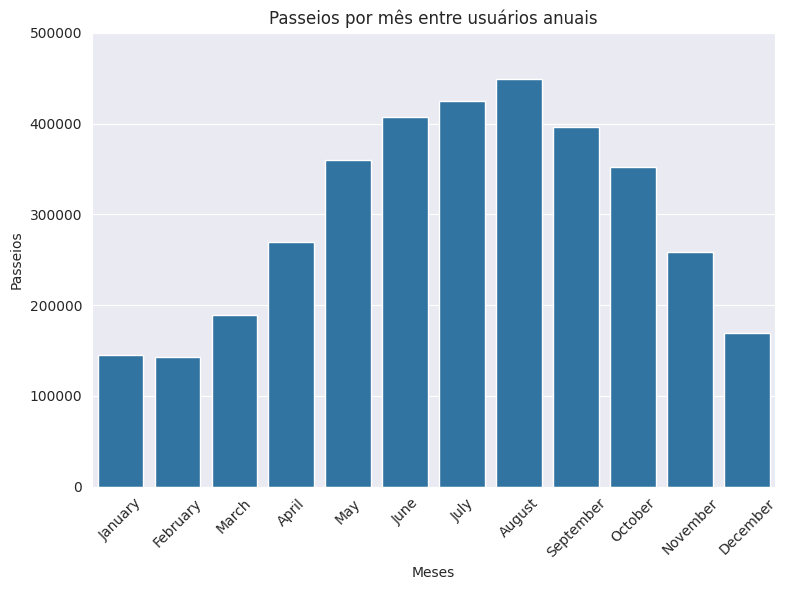

<Figure size 1200x500 with 0 Axes>

In [77]:
sns.barplot(anuais_por_mes, x=anuais_por_mes.index, y='ride_id')
plt.title('Passeios por mês entre usuários anuais')
plt.ylim((0,500_000))
plt.xlabel('Meses')
plt.ylabel('Passeios')
plt.xticks(rotation=45)
plt.figure(figsize=(12,5))
plt.show()